# Module 12 Challenge

**Step 1: Visit the Website and Inspect**

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape. To identify these elements, you might want to utilize Chrome DevTools to explore whether the table contains usable classes.

**Step 2: Scrape the Table**

Create a Beautiful Soup object and use it to extract data from the HTML table. Note that this task can also be accomplished using the Pandas `read_html` function. However, we recommend using Beautiful Soup to further enhance your web scraping skills.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the table containing the Mars weather data
    mars_table = soup.find("table", class_="table")

    # Use Pandas to read the table into a DataFrame
    mars_weather_df = pd.read_html(str(mars_table))[0]

    # Print the DataFrame
    print(mars_weather_df)

else:
    print("Failed to retrieve data from the website.")

# Save the DataFrame to a CSV file
mars_weather_df.to_csv("mars_weather.csv", index=False)


        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [19]:
 # Create an empty list to store rows
data_rows = []

    # Loop through the rows of the table
for row in mars_table.find_all("tr"):
        # Extract text from each cell in the row and store in a list
        row_data = [cell.get_text(strip=True) for cell in row.find_all(["th", "td"])]
        data_rows.append(row_data)


In [20]:
 # Extract the column names from the first row (header)
column_names = data_rows[0]

    # Remove the header row from the data
data_rows = data_rows[1:]

    # Create a Pandas DataFrame from the list of rows and column names
mars_weather_df = pd.DataFrame(data_rows, columns=column_names)


In [21]:
     # Print the DataFrame
print(mars_weather_df)


print("Failed to retrieve data from the website.")

# Save the DataFrame to a CSV file
mars_weather_df.to_csv("mars_weather.csv", index=False)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]
Failed to retrieve data from the website.


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [23]:
# Change data type of 'terrestrial_date' column to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

In [24]:
# Examine data types after changes
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
month_counts = mars_weather_df['month'].value_counts().reindex(range(1, 13)).fillna(174).astype(int)
print(month_counts)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [25]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_weather_df['sol'].nunique()
martian_days

1867

C:\Users\roelj\AppData\Local\Temp\ipykernel_19824\811234604.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  mars_weather_df['min_temp'] = mars_weather_df['min_temp'].str.replace('[^0-9.-]', '').apply(pd.to_numeric, errors='coerce')


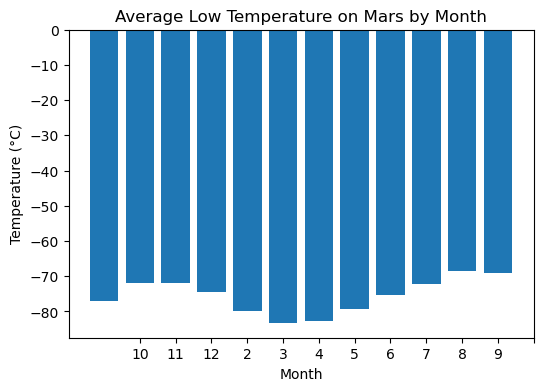

In [26]:
# Convert 'min_temp' column to string
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(str)

# Remove non-numeric characters from 'min_temp' and convert to numeric
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].str.replace('[^0-9.-]', '').apply(pd.to_numeric, errors='coerce')

# Calculate the average low temperature by month
avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
plt.bar(avg_low_temp.index, avg_low_temp.values)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Low Temperature on Mars by Month')
plt.xticks(range(1, 13))  

plt.show()


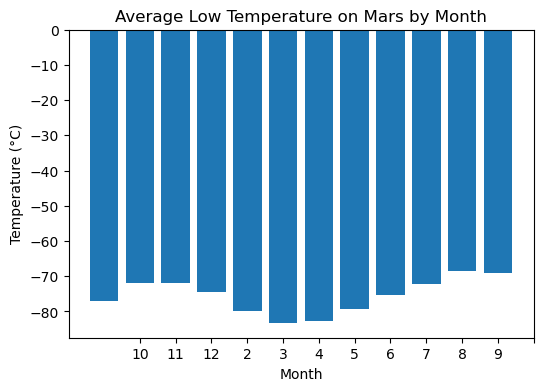

Coldest Month: 3
Average Low Temperature (Coldest Month): -83.30729166666667
Warmest Month: 8
Average Low Temperature (Warmest Month): -68.38297872340425


In [27]:
# Calculate the average low temperature by month
avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = avg_low_temp.idxmin()
coldest_temp = avg_low_temp.min()

warmest_month = avg_low_temp.idxmax()
warmest_temp = avg_low_temp.max()

# Plot the average temperature by month
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
plt.bar(avg_low_temp.index, avg_low_temp.values)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Low Temperature on Mars by Month')
plt.xticks(range(1, 13))  

plt.show()

print("Coldest Month:", coldest_month)
print("Average Low Temperature (Coldest Month):", coldest_temp)
print("Warmest Month:", warmest_month)
print("Average Low Temperature (Warmest Month):", warmest_temp)


In [28]:
# 4. Average pressure by Martian month
# Remove non-numeric characters from 'pressure' and convert to numeric
mars_weather_df['pressure'] = mars_weather_df['pressure'].str.replace('[^0-9.]', '').apply(pd.to_numeric, errors='coerce')

# Calculate the average pressure by month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure_by_month = avg_pressure_by_month.reindex(range(1, 13))

# Print the resulting table
print(avg_pressure_by_month)

month
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
Name: pressure, dtype: float64


C:\Users\roelj\AppData\Local\Temp\ipykernel_19824\66772963.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  mars_weather_df['pressure'] = mars_weather_df['pressure'].str.replace('[^0-9.]', '').apply(pd.to_numeric, errors='coerce')


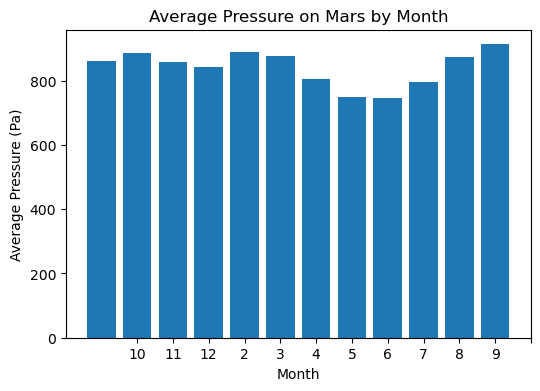

Month with Lowest Average Pressure: 6
Lowest Average Pressure (Pa): 745.0544217687075
Month with Highest Average Pressure: 9
Highest Average Pressure (Pa): 913.3059701492538


In [31]:
# Plot the average pressure by month
plt.figure(figsize=(6, 4))  
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')  # Add units to the y-axis label
plt.title('Average Pressure on Mars by Month')
plt.xticks(range(1, 13))

plt.show()

# Identify the months with the lowest and highest average pressures
low_pressure_month = avg_pressure_by_month.idxmin()
low_pressure = avg_pressure_by_month.min()

high_pressure_month = avg_pressure_by_month.idxmax()
high_pressure = avg_pressure_by_month.max()

print("Month with Lowest Average Pressure:", low_pressure_month)
print("Lowest Average Pressure (Pa):", low_pressure)
print("Month with Highest Average Pressure:", high_pressure_month)
print("Highest Average Pressure (Pa):", high_pressure)


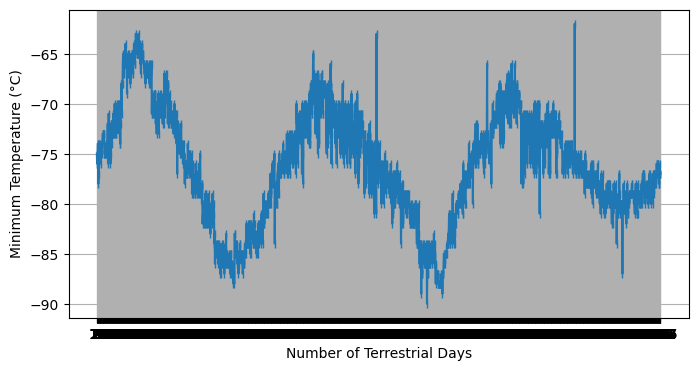

In [32]:
# Set the 'sol' column as the index of the DataFrame
mars_weather_df.set_index('sol', inplace=True)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(mars_weather_df.index, mars_weather_df['min_temp'], marker='|', linestyle='-')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)

plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
csv_filename = "mars_weather_data.csv"

mars_weather_df.to_csv(csv_filename, index=False)

In [21]:
browser.quit()